Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
print("hello")
# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

hello
<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Smallest k-means inertia value: 924.3159961688092


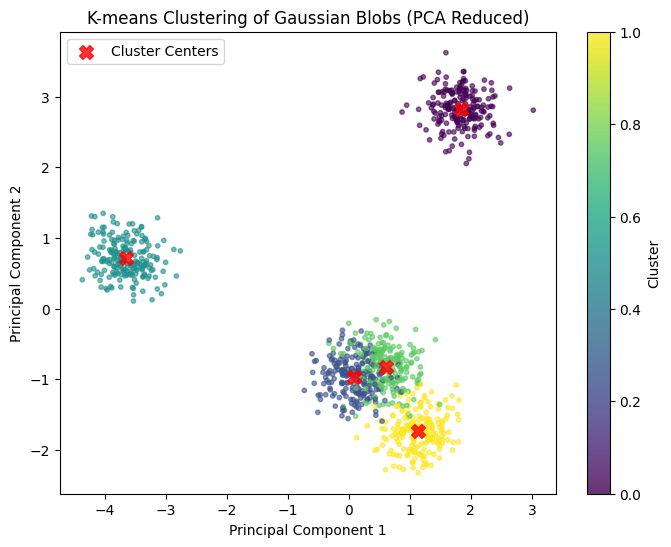

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=1, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

print(f"Smallest k-means inertia value: {kmeans.inertia_}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10, cmap='viridis', alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, alpha=0.8, marker='X', label='Cluster Centers')
plt.title('K-means Clustering of Gaussian Blobs (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

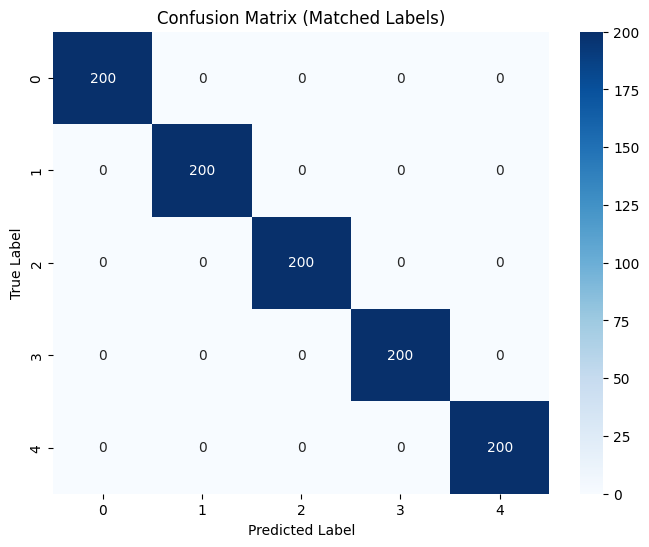

In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_true, y_pred)

cm_fixed = cm.copy()
cm_fixed[0], cm_fixed[2], cm_fixed[3] = cm[2], cm[3], cm[0]


plt.figure(figsize=(8, 6))
sns.heatmap(cm_fixed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Matched Labels)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

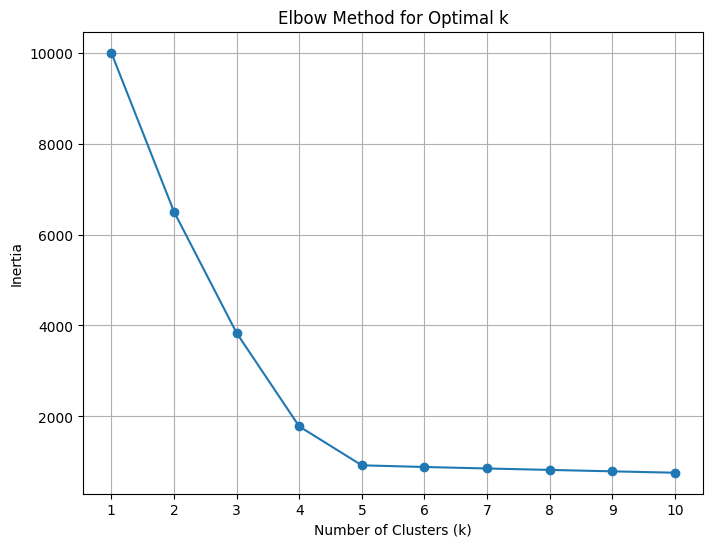

In [ ]:
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


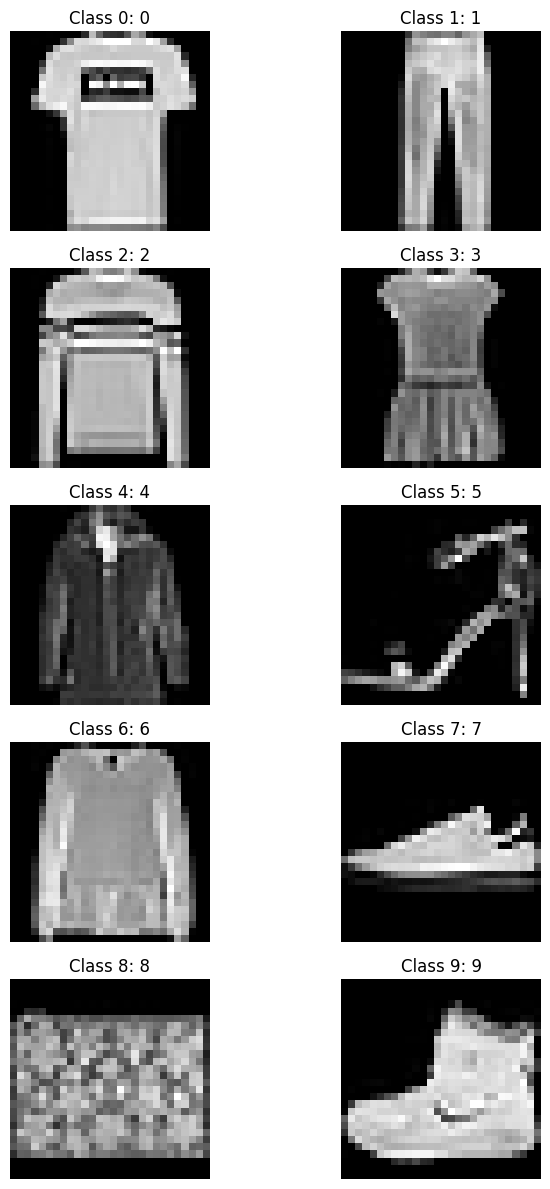

In [23]:
fig, axes = plt.subplots(5, 2, figsize=(8, 12))
axes = axes.flatten()

num_classes = 10
class_indices = [np.where(y == i)[0][0] for i in range(num_classes)]

for i, ax in enumerate(axes):
    img = X[class_indices[i]].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class {i}: {y[class_indices[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

K-means inertia value: 22175457.545010243


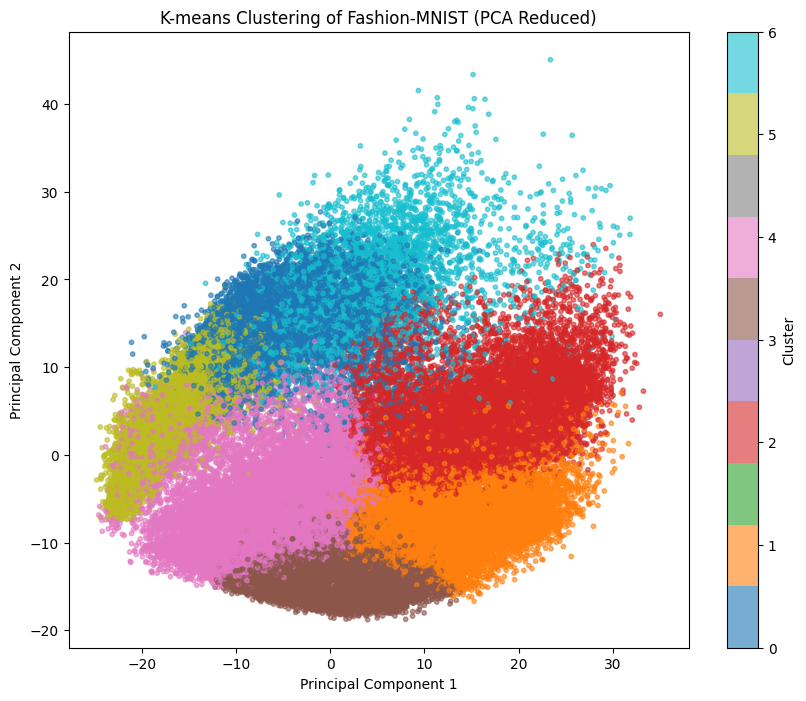

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=7, random_state=1, n_init=10)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)

print(f"K-means inertia value: {kmeans.inertia_}")

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10, cmap='tab10', alpha=0.6)
plt.title('K-means Clustering of Fashion-MNIST (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

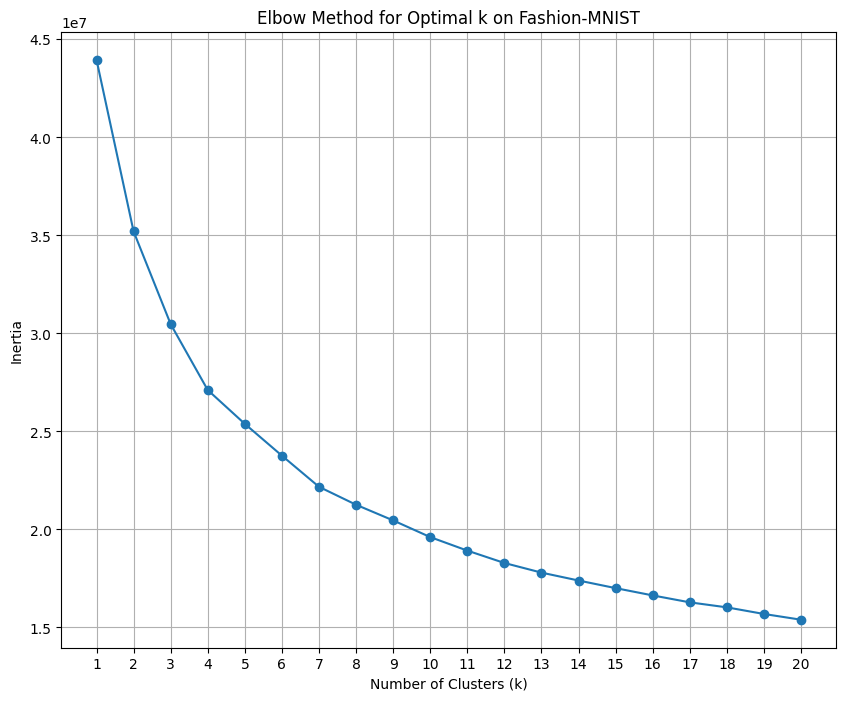

In [46]:
distortions = []
K_range = range(1, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k on Fashion-MNIST')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y, y_pred)



In [56]:
import numpy as np

def calculate_total_error(confusion_matrix):
    return np.sum(confusion_matrix) - np.trace(confusion_matrix)


In [57]:
import itertools
import math

best = math.inf
best_perm = []

for eachPerm in list(itertools.permutations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])):
    copy = cm.copy()
    for i in range(0, 10):
        copy[i] = cm[eachPerm[i]]

    score = calculate_total_error(copy)
    if score < best:
        best = score
        best_perm = eachPerm

print(best, best_perm)

35875 (9, 0, 2, 1, 6, 7, 8, 3, 4, 5)


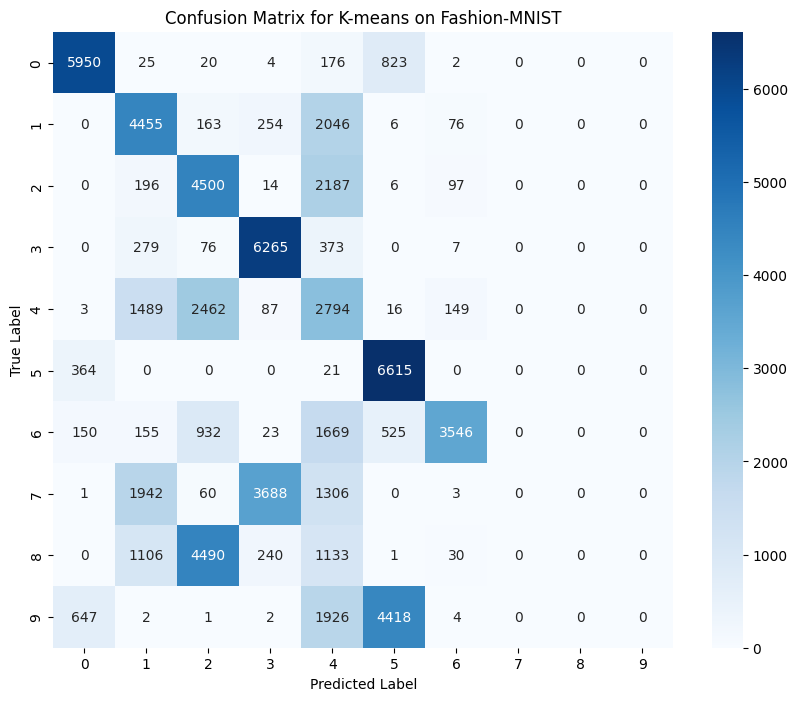

In [58]:
cm_matched = cm.copy()
for i in range(0, 10):
    cm_matched[i] = cm[[9,0,2,1,6,7,8,3,4,5][i]]


plt.figure(figsize=(10, 8))
sns.heatmap(cm_matched, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-means on Fashion-MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here